In [ ]:
def load_packages():

    # basics
    import os
    import numpy as np
    import pandas as pd
    import itertools as it
    import random
    from pathlib import Path

    #extras
    from tqdm import tqdm
    from collections import OrderedDict
    import joblib
    import inspect
    from typing import Iterable, Dict, Tuple, Optional, Any, List, Union

    #plotting
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    import seaborn as sns
    from adjustText import adjust_text
    from PIL import Image

    # warnings and debugging
    import importlib
    #import ipdb; #ipdb.set_trace()
    import logging
    logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
    logger = logging.getLogger(__name__)

    import warnings
    warnings.filterwarnings("once")  # Ensures warnings appear on every cell run
    #warnings.simplefilter("once")
    #warnings.simplefilter("error") #handle warnings as errors (used for DepreactionWarnings)
    #warnings.simplefilter("default")

    # modelbase
    import modelbase
    from modelbase.ode import Simulator
    from scipy import integrate

    print(importlib.metadata.version("modelbase"))

    globals().update(locals())


def change_wordir(): 
    script_dir = globals().get("script_dir", os.getcwd()) # if script_dir already exists, use it, otherwise use cwd
    #print(script_dir)
    os.chdir(f"{script_dir}/..")
    #print(os.getcwd())


In [17]:
def colourblind_palette(source: str = "seaborn", plot = True):
    if source == "seaborn":
        colors = list(sns.color_palette("colorblind").as_hex())
        colours = dict(zip(["blue", "orange", "green", "red", "purple", "beige", "pink", "gray", "yellow", "skyblue"], colors))

    elif source == "matplotlib":
        colors = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])
        colours = dict(zip(["blue", "orange", "green", "pink", "purple", "red", "brown", "grey", "lightgreen", "skyblue"], colors))

    elif source == "own":
        colors = ["#6AA7DE", "#FF7F00", "#2E7D47", "#F58BB2", "#8F3FBF", "#E41A1C", "#704214", "#8A8A8A"]
        colours = dict(zip(["blue", "orange", "green", "pink", "purple", "red", "brown", "grey"], colors))
    else:
        raise ValueError("source must be 'seaborn', 'matplotlib' or 'own'")

    return(colors, colours)


def load_model(model_name):
    
    path_to_model = f"models.{model_name}"  # Convert path to importable module format
    model_module = importlib.import_module(path_to_model) # Dynamically import the module    
    get_model = getattr(model_module, "get_model") # Access the function/class from the module

    m = get_model()
    print(f"\nsuccesfully loaded {model_name} :D")
    return m


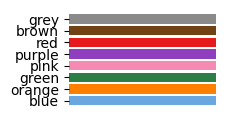

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# color_names, color_dict = colourblind_palette(source="own")

# fig, ax = plt.subplots(figsize=(2,1.3))
# ax.barh(color_names, [1] * len(color_names), color=[color_dict[name] for name in color_dict.keys()],)
# ax.set_xticks([])
# ax.set_yticks(range(len(color_dict.keys())))
# ax.set_yticklabels(color_dict.keys(), fontsize=10)
# ax.set_frame_on(False)

# plt.show()

In [ ]:
# HELPER FUNCTIONS

def debug_this(variable_name, variable, debug):
    if debug:
        print(f"\t\t!!!{variable_name}!!!\n{variable}\n")


def save_fig(fig, model, analysis, name, close_fig=True):
    folder = f"figures/{model}/{analysis}/"
    os.makedirs(folder, exist_ok=True)
    fig.savefig(f"{folder}{name}.png", pad_inches = 0.1, bbox_inches = "tight")
    if close_fig:
        plt.close(fig)

In [ ]:
def checkpoint(object_name, dir: str = "", filename: str = "", p_dir: str = "data/", overwrite=False):
    """
    Save or load a Python object using joblib, based on its name as a string.
    
    If the object with the given name exists in the global scope:
        - If the file does not exist, it is saved.
        - If the file exists and overwrite is True, it is overwritten (and a backup created)
        - If the file exists and overwrite is False, a warning is issued.
    
    If the object does not exist in the global scope:
        - It is loaded from the file if it exists.
        - If the file does not exist, a warning is raised.
    """
    import shutil

    if filename == "":
        filename = object_name
    filename += ".joblib"

    frame = inspect.currentframe().f_back
    final_dir = os.path.join(p_dir, dir)
    os.makedirs(final_dir, exist_ok=True)

    file_path = os.path.join(final_dir, filename)
    backup_path = os.path.join(final_dir, f"backup_{filename}")

    if object_name in frame.f_globals:
        obj = frame.f_globals[object_name]
        if os.path.exists(file_path):
            if overwrite:
                shutil.copy2(file_path, backup_path) # make a backup of the file
                joblib.dump(obj, file_path)
                print(f"Overwritten: {file_path},  (backup created at {backup_path})")
            else:
                warnings.warn(f"File already exists and will not be overwritten: {file_path}")
        else:
            joblib.dump(obj, file_path)
            print(f"Saved: {file_path}")
    else:
        if os.path.exists(file_path):
            obj = joblib.load(file_path)
            print(f"Loaded: {file_path}")
        else:
            warnings.warn(f"Object '{object_name}' not found and no saved file exists at: {file_path}")

    return obj